In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Set parameter values 
alph = 0.33
delt = 0.2
bet = 0.95
gamm = 2
g = 0.2

# Compute steady-state k - the terminal value of the model
k_ss = ((1/alph)*(1/bet-1+delt))**(1/(alph-1))
print(k_ss)

1.4899564934347787


1. The example we are going to look at here is an anticipated permanent change in 𝑔 from 0.2 to 0.4.

In [5]:
tol = 1e-4
itr_max = 400

g_n = 0.4 # new level of government spending
T_b4 = 2 # number of periods before the anticipated shock
T = 50
c_vec = np.zeros(T+1)
k_vec = np.zeros(T+1)

k0 = k_ss

c0_ub = k0**alph + (1-delt)*k0 - g 
c0_lb = 0
c0 = (c0_ub+c0_lb)/2

ii = 0
while ii < itr_max:
    c_vec[0] = c0
    k_vec[0] = k0
    
    for t in range(T):
        if t < T_b4-1: # Question: why -1?
            k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g-c_vec[t]
        else:
            k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g_n-c_vec[t]
        c_vec[t+1] = c_vec[t]*(bet*(alph*k_vec[t+1]**(alph-1)-delt+1))**(1/gamm)

    if np.abs(k_vec[T]-k_ss) < tol:
        print("Converged on iteration", ii+1)
        ii = itr_max
    elif k_vec[T] > k_ss:
        c0_lb = c0
    else:
        c0_ub = c0

    ii += 1
    c0 = (c0_ub + c0_lb)/2

Converged on iteration 27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


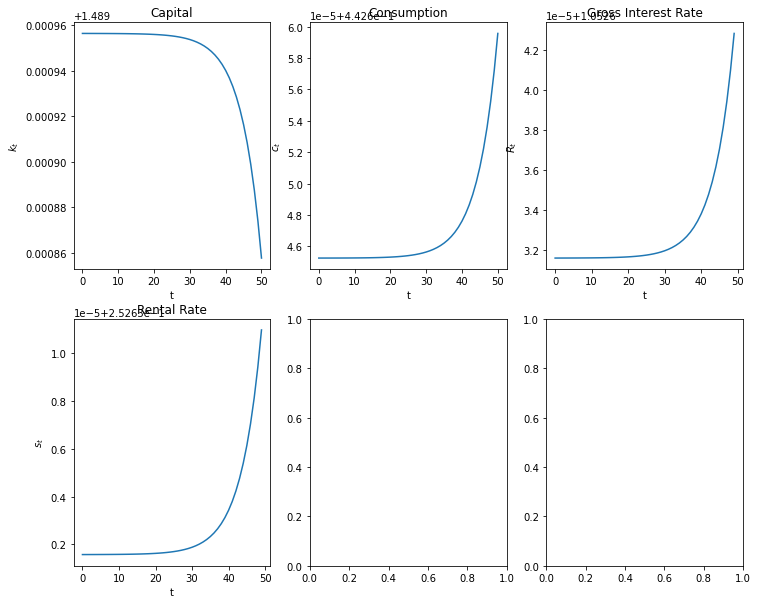

In [6]:
# Let's compute eta and R as well
eta_vec = np.zeros(T)
R_vec = np.zeros(T)

for t in range (T):
    eta_vec[t] = alph*k_vec[t]**(alph-1)
    R_vec[t] = c_vec[t]**(-gamm)/(bet*c_vec[t+1]**(-gamm))
    
fig, axs = plt.subplots(2,3, figsize=(12, 10))

axs[0,0].plot(k_vec)
axs[0,0].set(xlabel='t',ylabel='$k_t$', title = 'Capital')
axs[0,1].plot(c_vec)
axs[0,1].set(xlabel='t',ylabel='$c_t$', title = 'Consumption')
axs[0,2].plot(R_vec)
axs[0,2].set(xlabel='t',ylabel='$R_t$', title = 'Gross Interest Rate')
axs[1,0].plot(eta_vec)
axs[1,0].set(xlabel='t',ylabel='$s_t$', title = 'Rental Rate')

plt.show()

2. let $\gamma$=0.2 and the shock is the same as example 1 

In [16]:
old_k=k_vec.copy()
old_c=c_vec.copy()
old_R=R_vec.copy()
old_eta=eta_vec.copy()

In [29]:
gamm = 0.3
tol = 1e-4
itr_max = 400

g_n = 0.4 # new level of government spending
T_b4 = 10 # number of periods before the anticipated shock
T = 50
c_vec = np.zeros(T+1)
k_vec = np.zeros(T+1)

k0 = k_ss

c0_ub = k0**alph + (1-delt)*k0 - g 
c0_lb = 0
c0 = (c0_ub+c0_lb)/2

ii = 0
while ii < itr_max:
    c_vec[0] = c0
    k_vec[0] = k0
    
    for t in range(T):
        if t < T_b4-1: # Question: why -1?
            k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g-c_vec[t]
        else:
            k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g_n-c_vec[t]
        c_vec[t+1] = c_vec[t]*(bet*(alph*k_vec[t+1]**(alph-1)-delt+1))**(1/gamm)

    if np.abs(k_vec[T]-k_ss) < tol:
        print("Converged on iteration", ii+1)
        ii = itr_max
    elif k_vec[T] > k_ss:
        c0_lb = c0
    else:
        c0_ub = c0

    ii += 1
    c0 = (c0_ub + c0_lb)/2

Converged on iteration 40


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


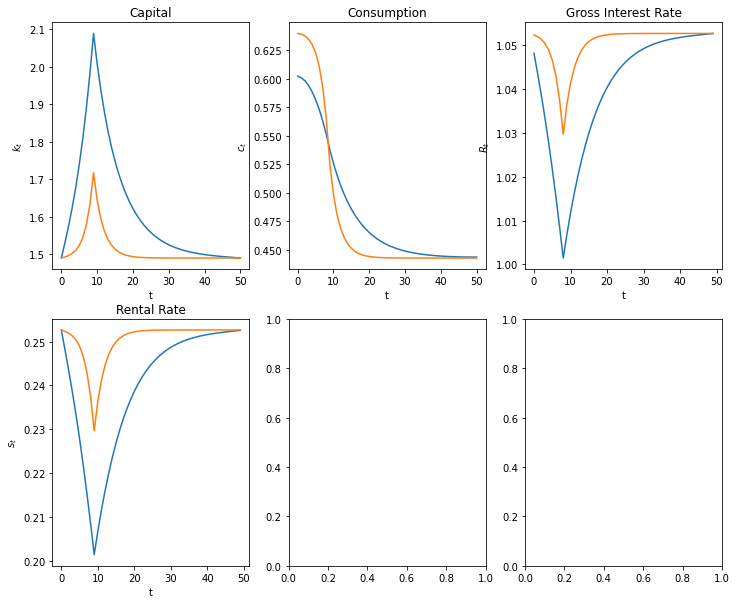

In [30]:
# Let's compute eta and R as well
eta_vec = np.zeros(T)
R_vec = np.zeros(T)

for t in range (T):
    eta_vec[t] = alph*k_vec[t]**(alph-1)
    R_vec[t] = c_vec[t]**(-gamm)/(bet*c_vec[t+1]**(-gamm))
    
fig, axs = plt.subplots(2,3, figsize=(12, 10))

axs[0,0].plot(old_k)
axs[0,0].plot(k_vec)
axs[0,0].set(xlabel='t',ylabel='$k_t$', title = 'Capital')
axs[0,1].plot(old_c)
axs[0,1].plot(c_vec)
axs[0,1].set(xlabel='t',ylabel='$c_t$', title = 'Consumption')
axs[0,2].plot(old_R)
axs[0,2].plot(R_vec)
axs[0,2].set(xlabel='t',ylabel='$R_t$', title = 'Gross Interest Rate')
axs[1,0].plot(old_eta)
axs[1,0].plot(eta_vec)
axs[1,0].set(xlabel='t',ylabel='$s_t$', title = 'Rental Rate')

plt.show()

3. The yiled curve 

[Text(0.5, 0, 't'),
 Text(0, 0.5, '$s_t$'),
 Text(0.5, 1.0, 'annulized interest rate')]

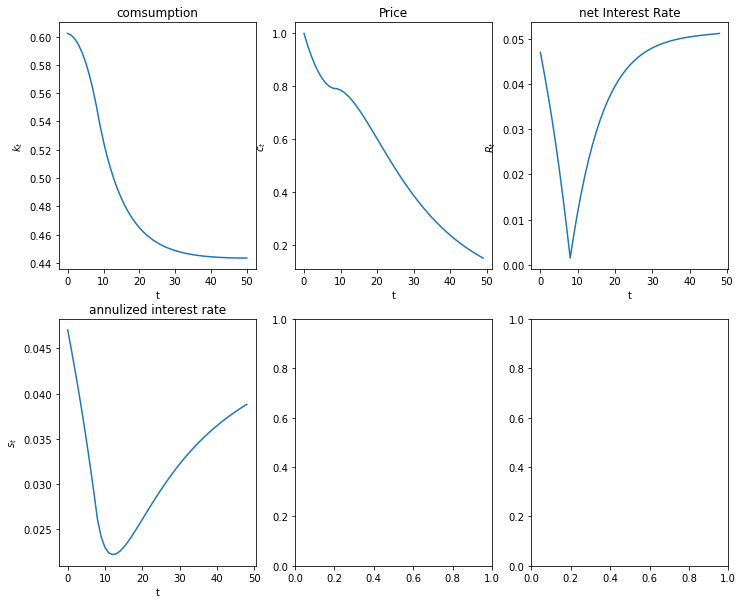

In [55]:
# Let's compute eta and R as well
q_vec = np.zeros(T)
r_t1_vec = np.zeros(T-1)
r_ts_vec = np.zeros(T-1)

for t in range (T):
    q_vec[t]=(bet**t)*old_c[t]**(-2)
for t in range (T-1):
        r_t1_vec[t]=np.log(q_vec[t]/q_vec[t+1])
        r_ts_vec[t]=np.log(q_vec[0]/q_vec[t+1])/(t+1)
        
fig, axs = plt.subplots(2,3, figsize=(12, 10))

axs[0,0].plot(old_c)
axs[0,0].set(xlabel='t',ylabel='$k_t$', title = 'comsumption')
axs[0,1].plot(q_vec/q_vec[0])
axs[0,1].set(xlabel='t',ylabel='$c_t$', title = 'Price')
axs[0,2].plot(r_t1_vec)
axs[0,2].set(xlabel='t',ylabel='$R_t$', title = 'net Interest Rate')
axs[1,0].plot(r_ts_vec)
axs[1,0].set(xlabel='t',ylabel='$s_t$', title = 'annulized interest rate')

4. Once-and-for-all inrease in ${\tau_c}$ at $t=10$

In [7]:
tau_c= 0.2
tol = 1e-4
itr_max = 400

T_b4 = 10 # number of periods before the anticipated shock
T = 50
c_vec = np.zeros(T+1)
k_vec = np.zeros(T+1)

k0 = k_ss

c0_ub = k0**alph + (1-delt)*k0 - g 
c0_lb = 0
c0 = (c0_ub+c0_lb)/2

ii = 0
while ii < itr_max:
    c_vec[0] = c0
    k_vec[0] = k0
    
    
    for t in range(T):
        k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g-c_vec[t]
        if t==T_b4-1:
            c_vec[t+1] = c_vec[t]*(bet*(alph*k_vec[t+1]**(alph-1)-delt+1)/(1+tau_c))**(1/gamm)
        else : 
            c_vec[t+1] = c_vec[t]*(bet*(alph*k_vec[t+1]**(alph-1)-delt+1))**(1/gamm)
        
        
    
    if np.abs(k_vec[T]-k_ss) < tol:
        print("Converged on iteration", ii+1)
        ii = itr_max
    elif k_vec[T] > k_ss:
        c0_lb = c0
    else:
        c0_ub = c0

    ii += 1
    c0 = (c0_ub + c0_lb)/2

Converged on iteration 30


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


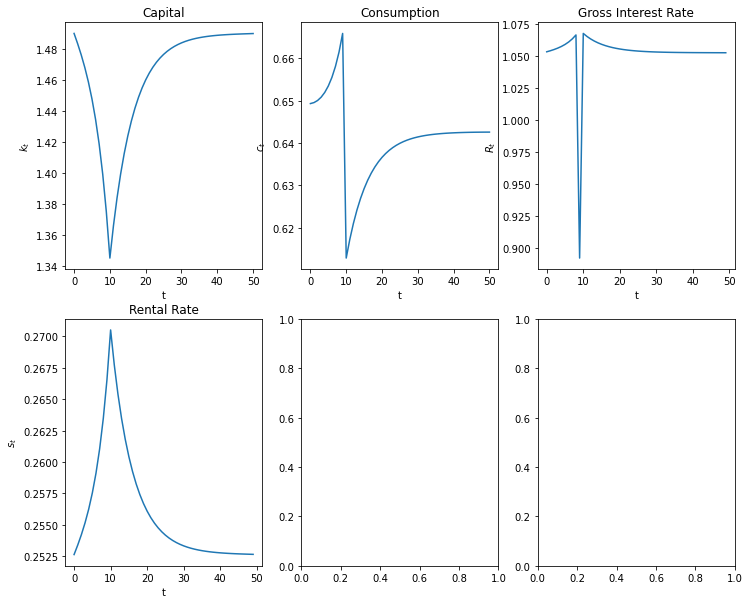

In [8]:
# Let's compute eta and R as well
eta_vec = np.zeros(T)
R_vec = np.zeros(T)

for t in range (T):
    eta_vec[t] = alph*k_vec[t]**(alph-1)
    if t==T_b4-1:
        R_vec[t] = 1/(1+tau_c)*(alph*k_vec[t+1]**(alph-1)-delt+1)
    else:
        R_vec[t] = (alph*k_vec[t+1]**(alph-1)-delt+1)
    
fig, axs = plt.subplots(2,3, figsize=(12, 10))

axs[0,0].plot(k_vec)
axs[0,0].set(xlabel='t',ylabel='$k_t$', title = 'Capital')
axs[0,1].plot(c_vec)
axs[0,1].set(xlabel='t',ylabel='$c_t$', title = 'Consumption')
axs[0,2].plot(R_vec)
axs[0,2].set(xlabel='t',ylabel='$R_t$', title = 'Gross Interest Rate')
axs[1,0].plot(eta_vec)
axs[1,0].set(xlabel='t',ylabel='$s_t$', title = 'Rental Rate')
plt.show()

4. Once-and-for-all inrease in ${\tau_k}$ at $t=10$

In [10]:
tau_k= 0.2
tol = 1e-4
itr_max = 400

T_b4 = 10 # number of periods before the anticipated shock
T = 40
c_vec = np.zeros(T+1)
k_vec = np.zeros(T+1)

# Compute new steady-state k - the terminal value of the model
k_ss_new = ((1/alph)*((1/bet-1)/(1-tau_k)+delt))**(1/(alph-1))

c0_ub = k0**alph + (1-delt)*k0 - g 
c0_lb = 0
c0 = (c0_ub+c0_lb)/2

ii = 0
while ii < itr_max:
    c_vec[0] = c0
    k_vec[0] = k0
    
    
    for t in range(T):
        k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g-c_vec[t]
        if t>=T_b4-1:
            c_vec[t+1] = c_vec[t]*(bet*((1-tau_k)*(alph*k_vec[t+1]**(alph-1)-delt)+1))**(1/gamm)
        else : 
            c_vec[t+1] = c_vec[t]*(bet*(alph*k_vec[t+1]**(alph-1)-delt+1))**(1/gamm)
        
    if np.abs(k_vec[T]-k_ss_new) < tol:
        print("Converged on iteration", ii+1)
        ii = itr_max
    elif k_vec[T] > k_ss_new:
        c0_lb = c0
    else:
        c0_ub = c0

    ii += 1
    c0 = (c0_ub + c0_lb)/2

Converged on iteration 27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


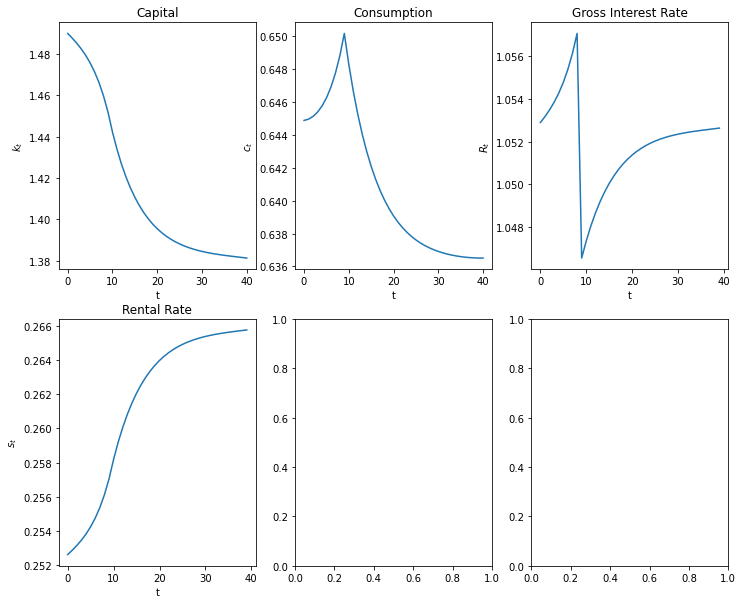

In [11]:
# Let's compute eta and R as well
eta_vec = np.zeros(T)
R_vec = np.zeros(T)

for t in range (T):
    eta_vec[t] = alph*k_vec[t]**(alph-1)
    if t>=T_b4-1:
        R_vec[t] =(1-tau_k)*(alph*k_vec[t+1]**(alph-1)-delt)+1
    else:
        R_vec[t] = (alph*k_vec[t+1]**(alph-1)-delt+1)
    
fig, axs = plt.subplots(2,3, figsize=(12, 10))

axs[0,0].plot(k_vec)
axs[0,0].set(xlabel='t',ylabel='$k_t$', title = 'Capital')
axs[0,1].plot(c_vec)
axs[0,1].set(xlabel='t',ylabel='$c_t$', title = 'Consumption')
axs[0,2].plot(R_vec)
axs[0,2].set(xlabel='t',ylabel='$R_t$', title = 'Gross Interest Rate')
axs[1,0].plot(eta_vec)
axs[1,0].set(xlabel='t',ylabel='$s_t$', title = 'Rental Rate')
plt.show()

5. one-time pulse increase in g

In [18]:
g_new= 0.4
tol = 1e-4
itr_max = 400

T_b4 = 10 # number of periods before the anticipated shock
T = 40
c_vec = np.zeros(T+1)
k_vec = np.zeros(T+1)

k0 = k_ss

c0_ub = k0**alph + (1-delt)*k0 - g 
c0_lb = 0
c0 = (c0_ub+c0_lb)/2

ii = 0
while ii < itr_max:
    c_vec[0] = c0
    k_vec[0] = k0
    
    
    for t in range(T):
        if t==T_b4-1:
            k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g_new-c_vec[t]
        else : 
            k_vec[t+1] = k_vec[t]**alph+(1-delt)*k_vec[t]-g-c_vec[t]
        c_vec[t+1] = c_vec[t]*(bet*(alph*k_vec[t+1]**(alph-1)-delt+1))**(1/gamm)
    if np.abs(k_vec[T]-k_ss) < tol:
        print("Converged on iteration", ii+1)
        ii = itr_max
    elif k_vec[T] > k_ss:
        c0_lb = c0
    else:
        c0_ub = c0

    ii += 1
    c0 = (c0_ub + c0_lb)/2

Converged on iteration 27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


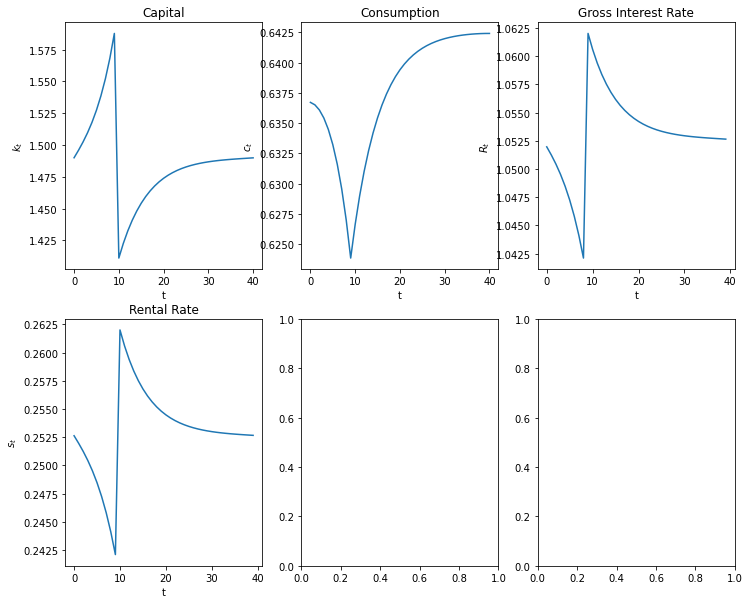

In [19]:
# Let's compute eta and R as well
eta_vec = np.zeros(T)
R_vec = np.zeros(T)

for t in range (T):
    eta_vec[t] = alph*k_vec[t]**(alph-1)
    R_vec[t] = (alph*k_vec[t+1]**(alph-1)-delt+1)
    
fig, axs = plt.subplots(2,3, figsize=(12, 10))

axs[0,0].plot(k_vec)
axs[0,0].set(xlabel='t',ylabel='$k_t$', title = 'Capital')
axs[0,1].plot(c_vec)
axs[0,1].set(xlabel='t',ylabel='$c_t$', title = 'Consumption')
axs[0,2].plot(R_vec)
axs[0,2].set(xlabel='t',ylabel='$R_t$', title = 'Gross Interest Rate')
axs[1,0].plot(eta_vec)
axs[1,0].set(xlabel='t',ylabel='$s_t$', title = 'Rental Rate')
plt.show()